In [199]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [200]:
df = pd.read_csv("insurance.csv")

In [201]:
df.sample(5)

,age,sex,bmi,children,smoker,region,charges
416,52,male,34.100,0,no,southeast,9140.95100
1205,35,male,17.860,1,no,northwest,5116.50040
1041,18,male,23.085,0,no,northeast,1704.70015
1268,20,female,33.300,0,no,southwest,1880.48700
339,46,female,27.720,1,no,southeast,8232.63880


#   data cleaning

In [202]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [203]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [204]:
df.sex.unique()

#this allso for every column..

array(['female', 'male'], dtype=object)

In [205]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [206]:
#   i convert smoker to 0 and 1

df2 = df.copy()
df2.smoker = df.smoker.apply(lambda x: 0 if x == "no" else 1).astype(int)

In [207]:
#   the samme with male / female

df3 = df2.copy()
df3.sex = df.sex.apply(lambda x: 0 if x == "female" else 1).astype(int)

In [208]:
print(df3.corr(method="spearman", numeric_only=True))

               age       sex       bmi  children    smoker   charges
age       1.000000 -0.020809  0.107736  0.056992 -0.025210  0.534392
sex      -0.020809  1.000000  0.044802  0.015589  0.076185  0.009490
bmi       0.107736  0.044802  1.000000  0.015607  0.002203  0.119396
children  0.056992  0.015589  0.015607  1.000000  0.016583  0.133339
smoker   -0.025210  0.076185  0.002203  0.016583  1.000000  0.663460
charges   0.534392  0.009490  0.119396  0.133339  0.663460  1.000000


In [209]:
df3.value_counts("smoker")

smoker
0    1064
1     274
Name: count, dtype: int64

In [210]:
df3.value_counts("children")
#   the data else appears to be clean.. For the ML i will remove the regions..

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

#   Visualisation

<Axes: >

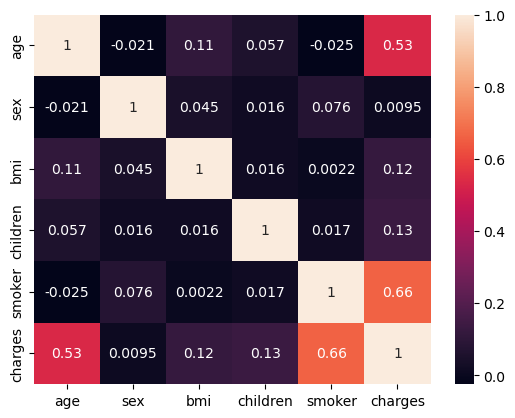

In [211]:
sns.heatmap(df3.corr(method="spearman", numeric_only=True), annot=True)

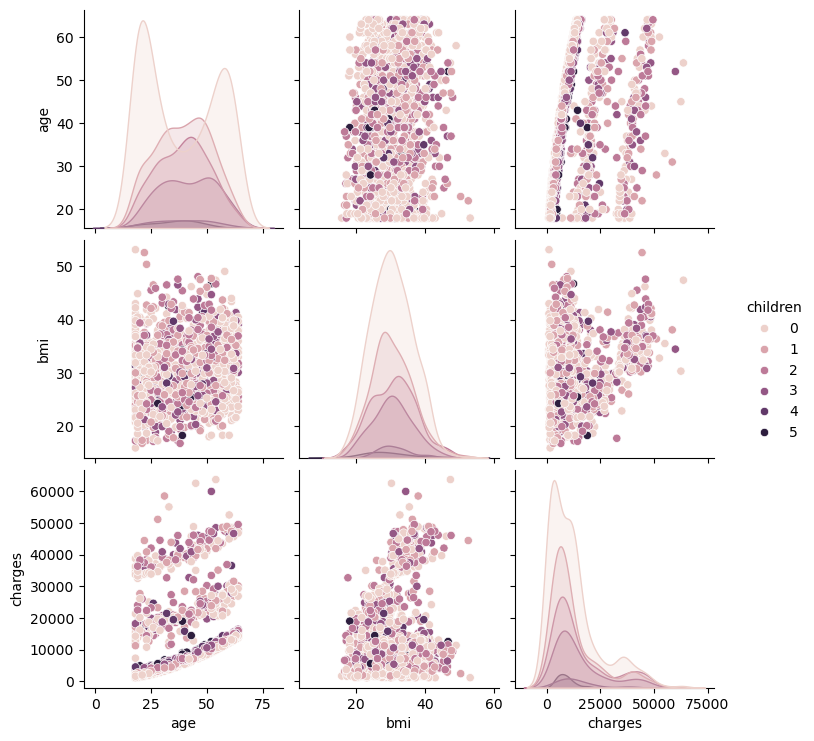

In [212]:
sns.pairplot(df, hue="children")

c:\Users\V. Stasiunaitis\anaconda3\Lib\site-packages\seaborn\distributions.py:1176: UserWarning: The following kwargs were not used by contour: 'kind'
  cset = contour_func(


<Axes: xlabel='bmi', ylabel='charges'>

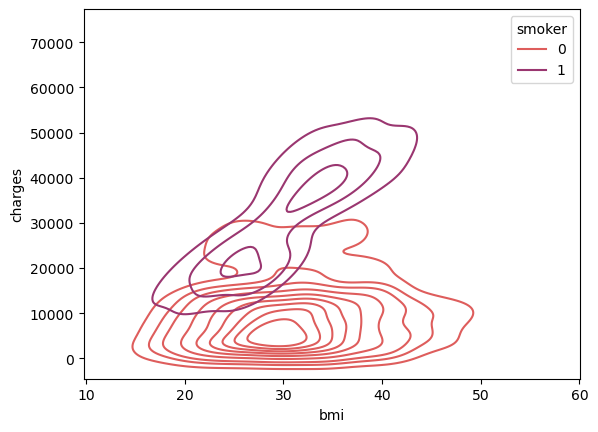

In [213]:
sns.kdeplot(kind="bar", x=df3["bmi"], y=df3["charges"], hue=df3["smoker"], palette="flare")

<Axes: xlabel='age', ylabel='charges'>

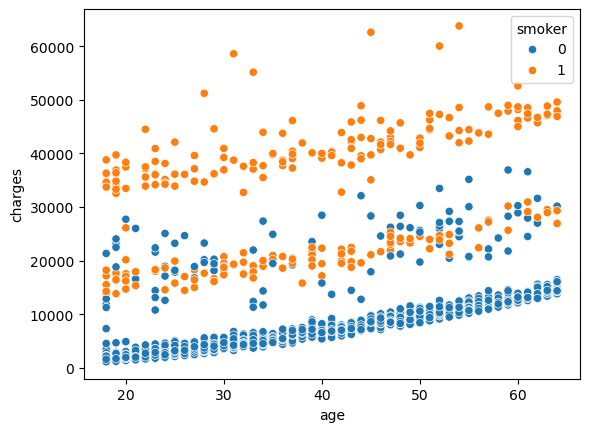

In [214]:
sns.scatterplot(x=df3["age"], y=df3["charges"], hue=df3["smoker"])

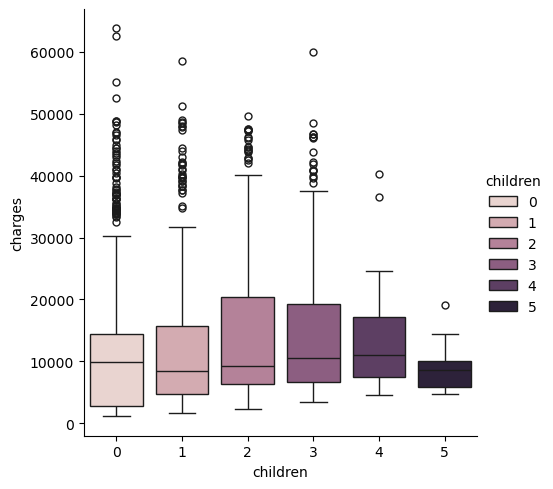

In [215]:
sns.catplot(kind="box", x=df3["children"], y=df3["charges"], hue=df3["children"])

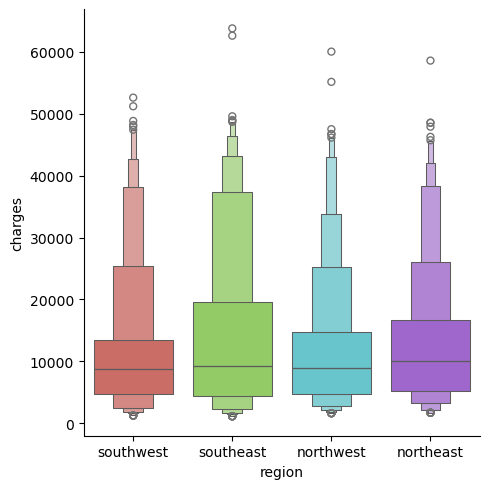

In [216]:
sns.catplot(kind="boxen", x=df3["region"], y=df3["charges"], hue=df3["region"], palette="hls")

<Axes: xlabel='bmi', ylabel='charges'>

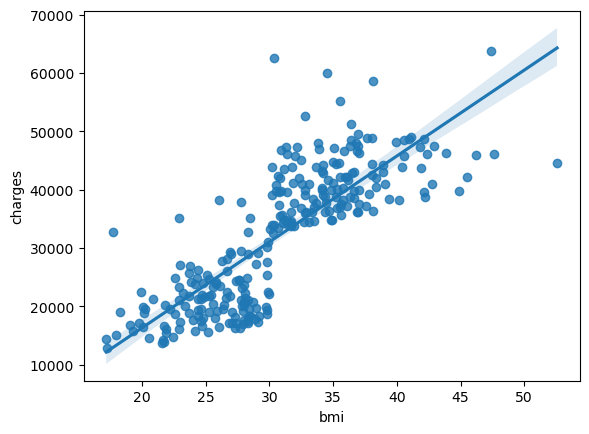

In [217]:
sns.regplot(data=df3[df3["smoker"]==1], x="bmi", y="charges")

#   Machine Learning

In [218]:
df4 = df3.drop("region", axis=1)

In [219]:
df4.sample(5)

,age,sex,bmi,children,smoker,charges
70,27,0,24.750,0,1,16577.77950
258,51,1,24.415,4,0,11520.09985
997,63,0,36.850,0,0,13887.96850
1074,60,0,18.335,0,0,13204.28565
1191,41,0,21.755,1,0,13725.47184


In [220]:
X=df4.drop("charges", axis=1)
y=df4["charges"]


In [221]:
X.sample(5)

,age,sex,bmi,children,smoker
919,35,0,34.210,1,0
520,50,0,27.360,0,0
280,40,0,28.120,1,1
1194,31,0,21.755,0,0
329,52,1,36.700,0,0


In [222]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression

In [223]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

#   Lineare Regression

In [224]:
LG = LinearRegression()
LG.fit(X_train, y_train)
predictions = LG.predict(X_test)
print(predictions)

[ 8405.9256603   6896.23868525 36895.58982383  9381.50792191
 26906.1365246  11167.26691409   -52.69388791 17003.5884751
   575.64200873 11145.24343373 28431.0500438   9298.88891839
  5294.83953877 38581.62045961 40647.29738538 37335.41236692
 15260.70329561 36045.12604011  9244.08043852 31386.21778584
  4015.58602553 10490.18916689  2708.82651796  6468.42991083
 11072.02704479 12500.72229041 14877.39949351  5794.09409262
  9403.21599957  2360.24884221  9217.51655148 13004.22249444
  4569.43116562  3115.50014448  4790.29128958 12649.03618987
  2138.09676654  9070.5629006  33211.37040636 32831.55019384
  3853.65967798  4188.60226701 14437.80767895 11564.56259495
  8911.3474146  12618.77374452  4913.52403387  3246.38268389
 35678.69855772  9262.17721379 16062.42168636  2482.54914576
 12104.01258015  1028.71074727 13752.32805479 12164.14248636
  3956.38216154 32006.49338924 13689.41565372 12427.40653715
 14570.03776924 10421.95533949 16750.91487706  7555.86074662
 11377.40842035  3820.341

In [225]:
LG.score(X_test, y_test)

0.7587422388407032

In [230]:
print(LG.coef_)
print(LG.intercept_)


[  262.35104943   146.5321422    331.64087047   377.66377381
 23693.21588352]
-12504.258025697405


In [227]:
import numpy as np

values = np.array([predictions]).reshape(-1,1)
true = np.array([y_test]).reshape(-1,1)
values = pd.DataFrame(np.concatenate((values, true), axis=1))


In [ ]:

test_pred = pd.DataFrame(y_test)
test_pred["predictions"] = predictions
test_pred

,charges,predictions
764,9095.06825,8405.925660
887,5272.17580,6896.238685
890,29330.98315,36895.589824
1293,9301.89355,9381.507922
259,33750.29180,26906.136525
...,...,...
644,18806.14547,11388.935926
602,11070.53500,10577.914765
731,10065.41300,9021.658138
321,24671.66334,5657.359755


#   Testing

In [229]:
import numpy as np

print(LG.predict(np.array([64,1,37,0,0]).reshape(1,-1)))
print(y_test.iloc[7])

print(X_test.iloc[7])

[16703.45348733]
14210.53595
age         64.000
sex          1.000
bmi         37.905
children     0.000
smoker       0.000
Name: 752, dtype: float64


c:\Users\V. Stasiunaitis\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
